### 0. The Quadratic Form
A quadratic form is simply a scalar, quadratic function of a vector with the form,
$$
f(x) = \frac{1}{2}x^T*A*x - b^T*x + c
$$

In [3]:
%matplotlib inline
import matplotlib
# import matplotlib.backends
# matplotlib.use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [4]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [5]:
def bowl(A, b, c):
    fig = plt.figure(figsize=(10, 8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-10, 10, size))
    x2 = list(np.linspace(-10, 10, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros(shape=(size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    return x1, x2, zs

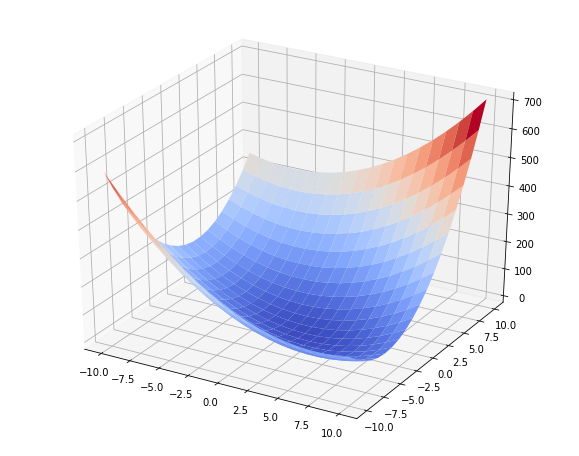

In [6]:
x1, x2, zs = bowl(A, b, c)
plt.show()

In [7]:
def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6, 6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        for i, step in enumerate(steps):
            steps = np.matrix(steps)
            plt.plot(steps[:, 0], steps[:, 1], '-o')

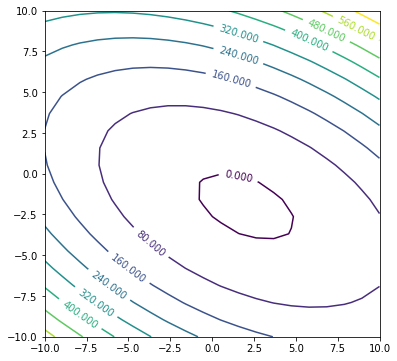

In [8]:
contoursteps(x1, x2, zs)
plt.show()

## 1. The Method of Steepest Descent.
In the method of steepest descent, we start at an arbitrary point $x_{(0)}$ and slide down to the bottom of the paraboloid. The direction is oppsite the gradient $\nabla f(x)$, which is $-\nabla f(x)=b-Ax$.

Suppose we start at $x_{0} = [-2, -2]^T$. We will choose a point 
\begin{align}
x_{1} &= x_{0} + \alpha r_{0} \\
&= x_{0} - \alpha \nabla f(x)
\end{align}

How can we choose the parameter $\alpha$, the answer is by using **line search**.

**Line Search Method**.
To determine $\alpha$, we want the gradient of the optimal point to be zero. Suppose we want to reach to the optimal point in only one step, it means, the optimal step size $\alpha$ must satisfy:
\begin{align}
\frac{d}{d\alpha}f(x_1) = \frac{d}{d\alpha}f(x_0 - \alpha \nabla f(x_0)) = 0\\
\end{align}

To solve this, we approximate the $f$ with Taylor polynomial:
\begin{align} 
f(x_0 - \alpha \nabla f(x_0)) \approx f(x_0) - \alpha \nabla f(x_0)^T \nabla f(x_0) + \frac{1}{2} \alpha^2 \nabla f(x_0)^T H \nabla f(x_0) + ...
\end{align}
... and then differentiate it with respect to $\alpha$ and set it equal to 0:
\begin{align} 
\frac{d}{d\alpha}f(x_1) &= \frac{d}{d\alpha}f(x_0 - \alpha \nabla f(x_0)) \\
&\approx \frac{d}{d\alpha} ( f(x_0) - \alpha \nabla f(x_0)^T \nabla f(x_0) + \frac{1}{2} \alpha^2 \nabla f(x_0)^T H(x_0) \nabla f(x_0))\\
&= 0 - \nabla f(x_0)^T \nabla f(x_0) + \alpha \nabla f(x_0)^T H(x_0) \nabla f(x_0) \\
&= 0 \\
\Rightarrow \alpha &= \frac{\nabla f(x_0)^T \nabla f(x_0)}{\nabla f(x_0)^T H(x_0) \nabla f(x_0)}
\end{align}


solved in 7 steps.


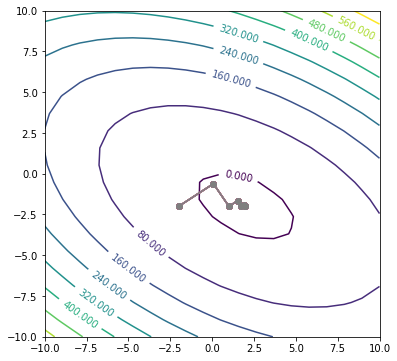

In [9]:
# # # Steepest Descent
x = np.matrix([[-2.0], [-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A*x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps **2 * delta0:
    # update alpha, the learning rate
    alpha = float((r.T * r) / (r.T * (A * r)))
    # update the x 
    x = x + alpha * r
    r = b - A*x
    # 
    delta = r.T * r
    steps.append((x[0,0], x[1,0]))
    i += 1
print("solved in {} steps.".format(i))
contoursteps(x1, x2, zs, steps)
plt.show()

## 2. The Method of Gradient Descent
$\alpha$ is fixed.
\begin{align}
x_{1} &= x_{0} + \alpha r_{0} \\
&= x_{0} - \alpha \nabla f(x)
\end{align}


In [10]:
# # # Gradient descent, fix the step size, alpha. 
imax = 1000
eps = 0.01
def gradient_descent(alpha):
    x = np.matrix([[-2.0], [-2.0]])
    steps = [(-2.0, -2.0)]
    i = 0    
    r = b - A * x
    delta = r.T * r
    delta0 = delta
    while i < imax and delta > eps**2 * delta0:
        x = x + alpha * r
        r = b - A * x
        steps.append((x[0,0], x[1,0]))
        delta = r.T * r
        i +=1
    print("Solved in {} steps.".format(i))
    return steps

Solved in 138 steps.


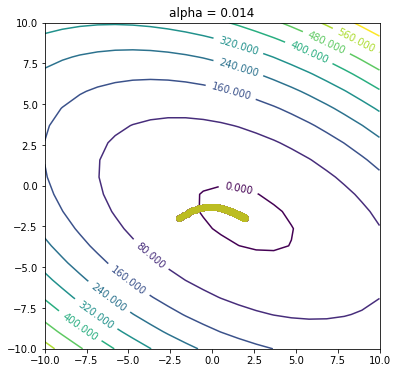

In [12]:
alpha = 0.014
steps = gradient_descent(alpha)
contoursteps(x1, x2, zs, steps)
plt.title("alpha = {}".format(alpha))
plt.show()

Solved in 18 steps.


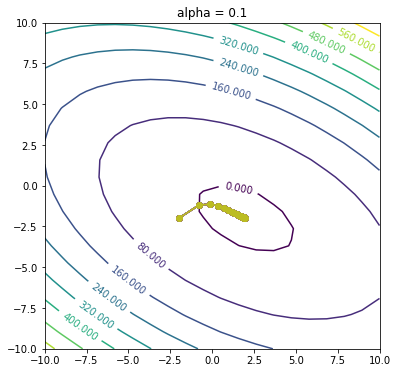

In [14]:
alpha = 0.1
steps = gradient_descent(alpha)
contoursteps(x1, x2, zs, steps)
plt.title("alpha = {}".format(alpha))
plt.show()

## 3. The Method of Conjugate Gradients

From the method of steepest gradient, we know 
\begin{align}
x_{i+1} = x_{i} + \alpha r_{i} 
\end{align}
\begin{align}
\alpha_i &= \frac{\nabla f(x_i)^T \nabla f(x_i)}{\nabla f(x_i)^T H(x_i) \nabla f(x_i)} \\
r_i &= - \nabla f(x_i)
\end{align}
However there is a problem in steepest gradient, by moving $\alpha_0$ in direction $r_0$ (to find the minimum in the direction $r_0$) and then moving $\alpha_1$ in direction $d_1$, we may ruin our work from the previous iteration, so that we are no longer at the minimum in direction $d_0$. In order to rectify this, we require that our directions be ***Conjugate*** to one another.


We define two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ to be conjugate with respect to some semi-definite matrix $\boldsymbol{A}$ if $\boldsymbol{x^T Ay}=0$. (Semi-definite matrices are ones where $\boldsymbol{x^T Ay} >= 0$ for all  $\boldsymbol{x}$, and are what we require for conjugate gradient.) Since we have already moved in the $r_0 = -\nabla f(x_0)$ direction, we must find a new direction $d_1$ to move in that is conjuvate to $d_0$. How do we do this? Well, lets compute $d_1$ by starting with the gradient at $x_1$ and then substracting off anything that would counter-act the previous direction:
\begin{align}
r_1 = -\nabla f(x_1) + \beta_0 r_0
\end{align}
Now, the question will be - what is $\beta_0$? We can derive that from our definition of conjugacy. Since $r_0$ and $r_1$ must be conjugate, we know that $r^T_1Ar_0 = 0$. Expanding $r_1$ by using its definition, we get that $r^T_1 A r_0 = -\nabla f(x_1)^TAr_0 + \beta_0 r^T_0 A d_0 = 0$, therefore, we must choose $\beta_0$ such that
\begin{align}
\beta_0 = \frac{\nabla f(x_1)^T A r_0}{ r^T_0 A r_0}
\end{align}
Choosing the $\beta$ gives us a direction conjugate to all previous directions. Interestingly enough, iterating this will keep giving us conjugate directions. After generating each direction, we find the best $\alpha$ for that direction and update the current estimate of position.



#### Conjugate Gradient Algorithm
> * Let $f$ be a quadratic function $f(x)=\frac{1}{2}x^T A x- b^Tx + c$ which we wish to minimize,
    * 1 Initialize: Let $i = 0$ and $x_i = x_0$ be our initial guess, and compute $r_i=d_0=-\nabla f(x_0)$.
    * 2 Find best step size: Computer $\alpha$ to minimize the function $f(x_i + \alpha r_i) via the equation$
    \begin{align}
    \alpha = - \frac{r^T_i (Ax-b)}{r^T_i A r_i}
    \end{align}
    * 3 Update the current guess: Let $x_{i+1} = x_i + \alpha_i r_i$
    * 4 Update the direction: Let $r_{i+1} = -\nabla f(x_{i+1}) + \beta_i r_i$ where $\beta_i$ is given by
    \begin{align}
    \beta_i = \frac{\nabla f(x_{i+1})^T A r_i}{r^T_i A r_i}
    \end{align}
    * 5 Iterat: Repeat steps 2-4 until we have looked in $n$ directions, where $n$ is the size of your vector space (the dimension of x).
 

In [15]:
eps = 0.01
imax = 10
def conjugate_gradient():
    x = np.matrix([[-2.], [-2.]])
    steps = [(-2., -2.)]
    i = 0
    r = b - A * x
    d = r
    deltanew = r.T * r
    delta0 = deltanew
    while i < imax and deltanew > eps**2 * delta0:
        alpha = float(deltanew / float(d.T * (A * d)))
        x = x + alpha * d
        steps.append((x[0, 0], x[1, 0]))
        r = b - A * x
        deltaold = deltanew
        deltanew = r.T * r
        beta = float(deltanew / float(deltaold))
        d = r + beta * d
        i += 1
    print("Solved in {} steps".format(i))
    return steps

Solved in 2 steps


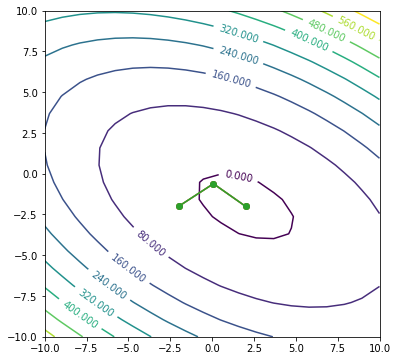

In [16]:
steps = conjugate_gradient()
contoursteps(x1, x2, zs, steps)
plt.show()

## 4. Newton-Raphson Method

\begin{align}
x_{i+1} = x_i - A(x_i)^{-1}\nabla f(x_i))
\end{align}

In [17]:
# # # Gradient descent, fix the step size, alpha. 
imax = 1000
eps = 0.01
def newton_raphson():
    x = np.matrix([[-2.0], [-2.0]])
    steps = [(-2.0, -2.0)]
    i = 0    
    r = b - A * x
    delta = r.T * r
    delta0 = delta
    while i < imax and delta > eps**2 * delta0:
        alpha = np.linalg.inv(A)
        x = x + alpha * r
        r = b - A * x
        steps.append((x[0,0], x[1,0]))
        delta = r.T * r
        i +=1
    print("Solved in {} steps.".format(i))
    return steps

Solved in 1 steps.


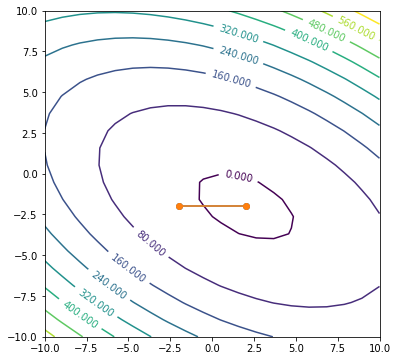

In [18]:
steps = newton_raphson()
contoursteps(x1, x2, zs, steps)
plt.show()

## 5. Trust-Region Methods